In [1]:
from mylib import *

[[6.         4.33012702]
 [4.5        3.46410162]
 [4.5        5.19615242]]


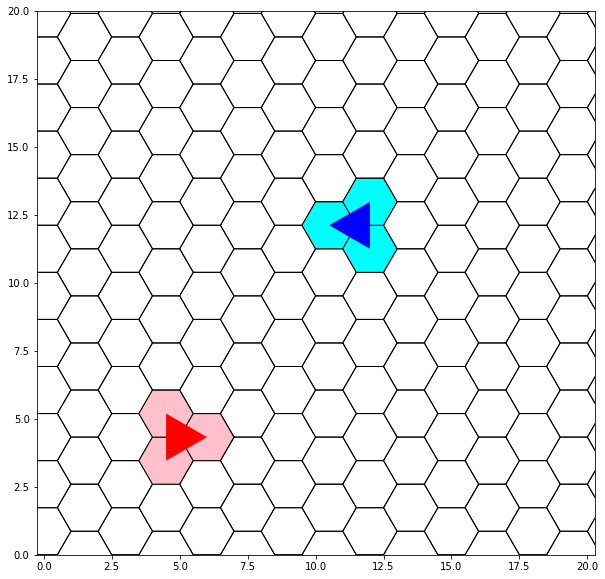

In [2]:
tlist0 = [((4, 2), 0, 'red', 'pink'), ((7, 7), 1, 'blue', 'cyan')]
draw(tlist0)
print(get_trimer_xy(tlist0[0][0], tlist0[0][1]))

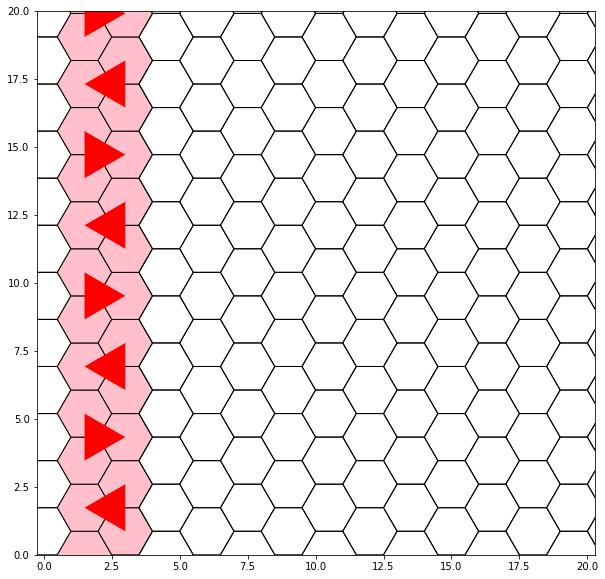

In [47]:
tlist0 = make_stripe(1, 0, 'red', 'pink')
draw(tlist0)

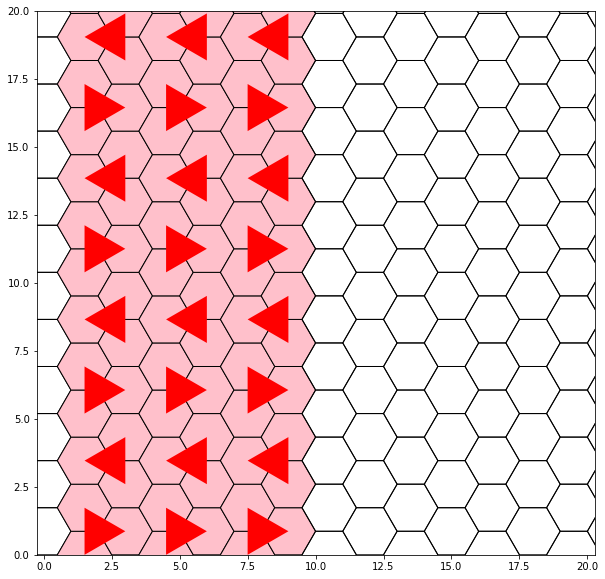

In [36]:
tlist0 = make_stripe(1, 0, 'red', 'pink')
tlist1 = make_stripe(3, 0, 'red', 'pink')
tlist2 = make_stripe(5, 0, 'red', 'pink')
draw(tlist0 + tlist1 + tlist2)

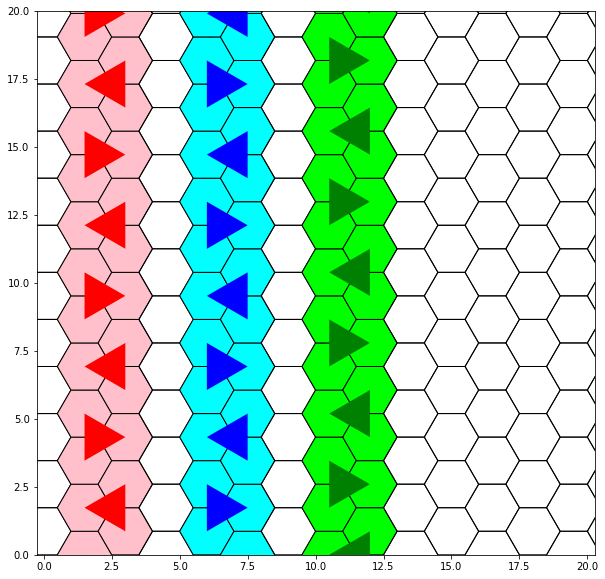

In [62]:
tlist0 = make_stripe(1, 0, 'red', 'pink')
tlist1 = make_stripe(4, 1, 'blue', 'cyan')
tlist2 = make_stripe(7, 2, 'green', 'lime')
draw(tlist0 + tlist1 + tlist2)

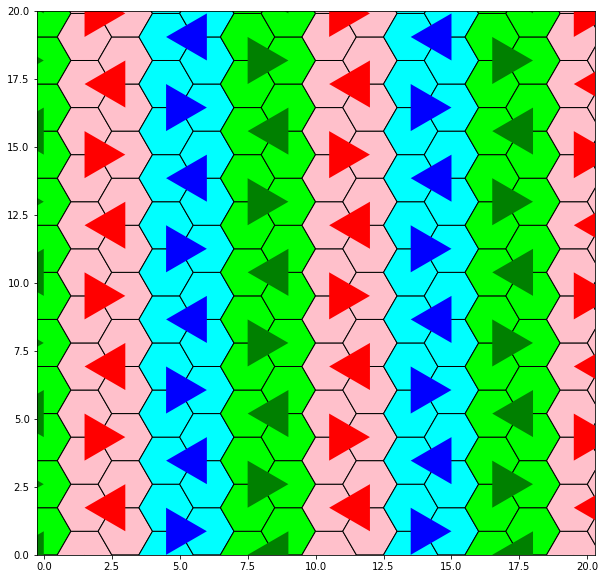

In [63]:
tlist0_ = make_stripe(-1, 2, 'green', 'lime')
tlist0 = make_stripe(1, 0, 'red', 'pink')
tlist1 = make_stripe(3, 1, 'blue', 'cyan')
tlist2 = make_stripe(5, 2, 'green', 'lime')
tlist3 = make_stripe(7, 0, 'red', 'pink')
tlist4 = make_stripe(9, 1, 'blue', 'cyan')
tlist5 = make_stripe(11, 2, 'green', 'lime')
tlist6 = make_stripe(13, 0, 'red', 'pink')
draw(tlist0_ + tlist0 + tlist1 + tlist2 + tlist3 + tlist4 + tlist5 + tlist6)

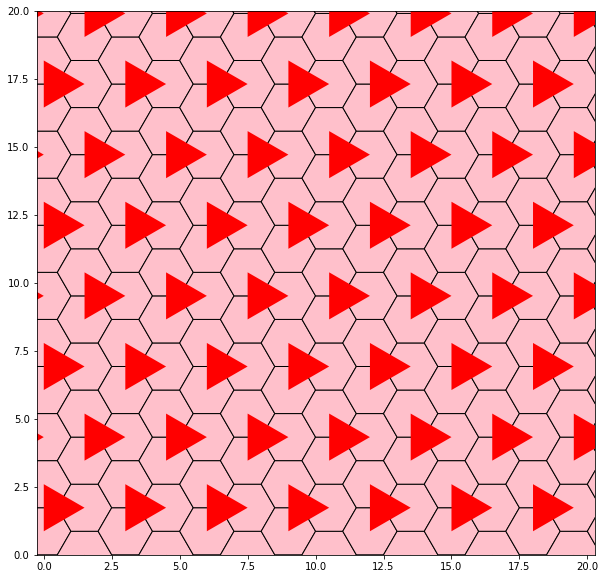

In [8]:
nside = 10
middle = nside * 2 * nside + nside
l = []
for i in range(nside):
    for j in range(nside * 2):
        l.append(((2 * j, -1 + 3 * i), 0, 'red', 'pink'))
        l.append(((-1 + 2 * j, 1 + 3 * i), 0, 'red', 'pink'))
        
draw(l)
#print(xy)

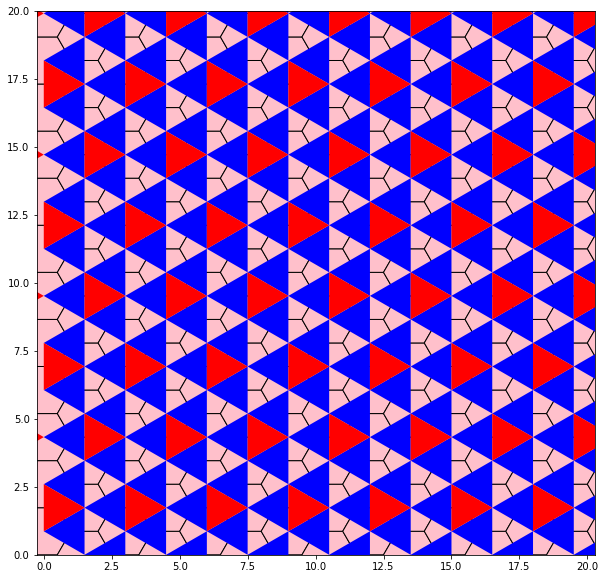

In [9]:
nside = 10
middle = nside * 2 * nside + nside
l = []
for i in range(nside * 2):
    for j in range(nside * 2):
        l.append(((j, i), 1, 'blue', 'white'))
for i in range(nside):
    for j in range(nside * 2):
        l.append(((2 * j, -1 + 3 * i), 0, 'red', 'pink'))
        l.append(((-1 + 2 * j, 1 + 3 * i), 0, 'red', 'pink'))

        
draw(l)
#print(xy)

In [10]:
int_termsAA = []
middle_xy = get_trimer_xy(l[middle][0], l[middle][1])
a = middle_xy[2, 1] - middle_xy[1, 1]
for index, i in enumerate(l):
    if index != middle:
        xy = get_trimer_xy(i[0], i[1])
        v = 0
        for k in range(3):
            for kk in range(3):
                v += 1/np.hypot(xy[k][0] - middle_xy[kk][0], xy[k][1] - middle_xy[kk][1])/9 * a
                
        int_termsAA.append(v)
int_termsAA.sort(reverse=True)

<ipython-input-10-3a628cc8eb47>:10: RuntimeWarning: divide by zero encountered in double_scalars
  v += 1/np.hypot(xy[k][0] - middle_xy[kk][0], xy[k][1] - middle_xy[kk][1])/9 * a


In [11]:
X = np.linspace(0.1, 1, 10)
Y1 = []
for x in X:
    pts = []
    for i in l:
        xy = get_trimer_xy(i[0], i[1])
        xy = pull_in_trimer(xy, x)
        for i in range(xy.shape[0]):
            pts.append(xy[i])
        
    Y1.append(calculate_coulomb(pts))

KeyboardInterrupt: 

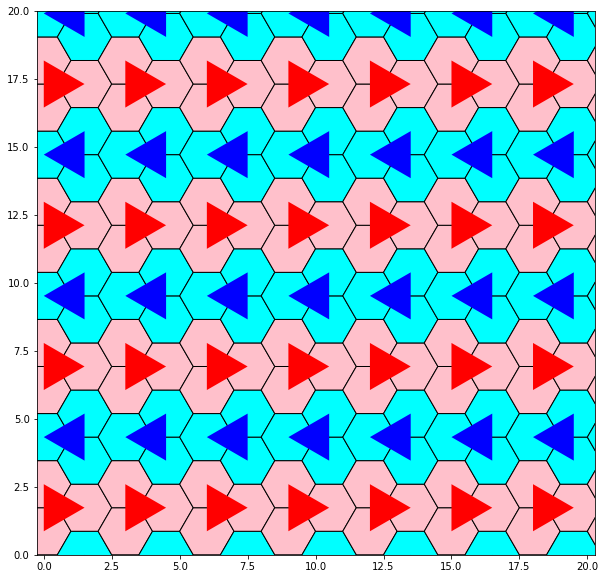

In [12]:
l = []
for i in range(nside):
    for j in range(nside * 2):
        l.append(((2 * j, -1 + 3 * i), 1, 'blue', 'cyan'))
        l.append(((1 + 2 * j, 1 + 3 * i), 0, 'red', 'pink'))
        
draw(l)

In [13]:
int_termsAB = []
middle_xy = get_trimer_xy(l[middle][0], l[middle][1])
for index, i in enumerate(l):
    if index != middle:
        xy = get_trimer_xy(i[0], i[1])
        v = 0
        for k in range(3):
            for kk in range(3):
                v += 1/np.hypot(xy[k][0] - middle_xy[kk][0], xy[k][1] - middle_xy[kk][1])/9*a
                
        int_termsAB.append(v)
int_termsAB.sort(reverse=True)

In [23]:
Y2 = []
for x in X:
    pts = []
    for i in l:
        xy = get_trimer_xy(i[0], i[1])
        xy = pull_in_trimer(xy, x)
        for i in range(xy.shape[0]):
            pts.append(xy[i])
        
    Y2.append(calculate_coulomb(pts))

ValueError: x and y must have same first dimension, but have shapes (10,) and (2,)

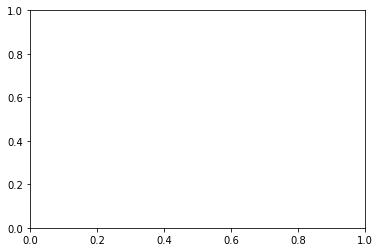

In [14]:
plt.plot(X, Y1)
plt.plot(X, Y2)
plt.figure()
plt.ylabel('difference between configs 1 and 2')
plt.xlabel('parameter controlling distance of 1/3 point charges from Wannier function center')
plt.plot(X, np.array(Y1) - np.array(Y2))


In [1]:
for i in range(len(int_termsAA)):
    if int_termsAA[i] > 0.65:
        int_termsAA[i] = 0.697
    elif int_termsAA[i] > 0.6:
        int_termsAA[i] = 0.614
    
    if int_termsAB[i] > 0.65:
        int_termsAB[i] = 0.697
    elif int_termsAB[i] > 0.6:
        int_termsAB[i] = 0.614

plt.plot((np.cumsum(int_termsAA) - np.cumsum(int_termsAB))[:500])
plt.axhline(0, ls='--')
plt.ylabel('$E_{AA} - E_{AB}$')
plt.xlabel('number of nearest neighbor terms')
#print(int_termsAB)

print((np.cumsum(int_termsAA) - np.cumsum(int_termsAB))[:5])

NameError: name 'int_termsAA' is not defined

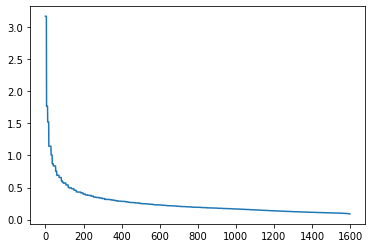

In [62]:
plt.plot(int_termsAA)

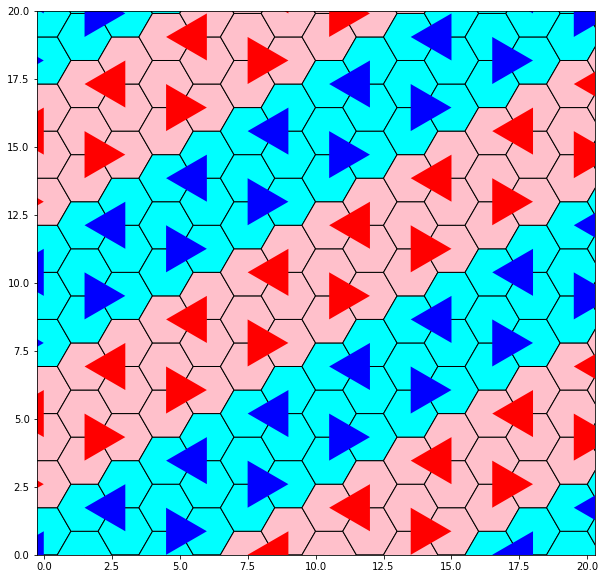

In [6]:
tlist0_ = make_stripe(-1, 2, 'green', 'lime')
tlist0 = make_stripe(1, 0, 'red', 'pink')
tlist1 = make_stripe(3, 1, 'blue', 'cyan')
tlist2 = make_stripe(5, 2, 'green', 'lime')
tlist3 = make_stripe(7, 0, 'red', 'pink')
tlist4 = make_stripe(9, 1, 'blue', 'cyan')
tlist5 = make_stripe(11, 2, 'green', 'lime')
tlist6 = make_stripe(13, 0, 'red', 'pink')

t = tlist0_ + tlist0 + tlist1 + tlist2 + tlist3 + tlist4 + tlist5 + tlist6
newlist = []
for ij, d, fc, bc in t:
    ind = (ij[0] - 1) // 2 - ij[1]
    if ind % 2 == 0:
        fc = 'red'
        bc = 'pink'
    else:
        fc = 'blue'
        bc = 'cyan'
    newlist.append((ij, d, fc, bc))

draw(newlist)

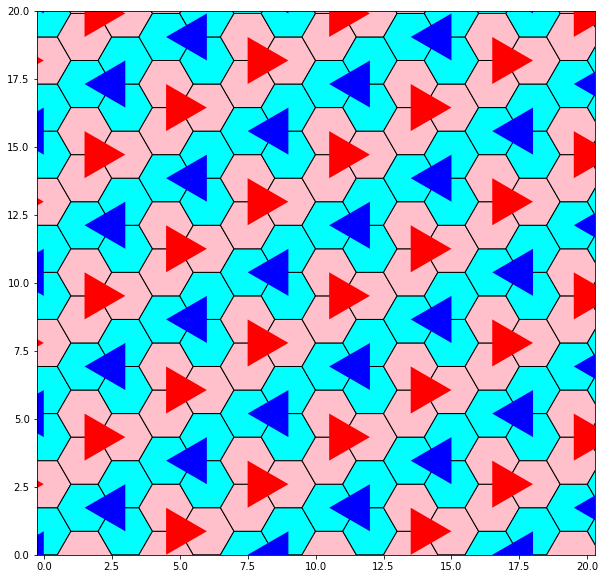

In [7]:
tlist0_ = make_stripe(-1, 2, 'green', 'lime')
tlist0 = make_stripe(1, 0, 'red', 'pink')
tlist1 = make_stripe(3, 1, 'blue', 'cyan')
tlist2 = make_stripe(5, 2, 'green', 'lime')
tlist3 = make_stripe(7, 0, 'red', 'pink')
tlist4 = make_stripe(9, 1, 'blue', 'cyan')
tlist5 = make_stripe(11, 2, 'green', 'lime')
tlist6 = make_stripe(13, 0, 'red', 'pink')

t = tlist0_ + tlist0 + tlist1 + tlist2 + tlist3 + tlist4 + tlist5 + tlist6
newlist = []
for ij, d, fc, bc in t:
    ind = (ij[0] - 1) // 2 - ij[1]
    if d == 0:
        fc = 'red'
        bc = 'pink'
    else:
        fc = 'blue'
        bc = 'cyan'
    newlist.append((ij, d, fc, bc))

draw(newlist)

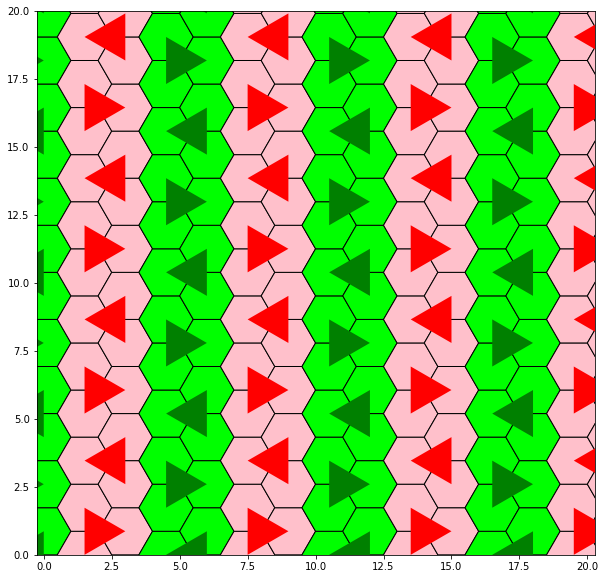

In [40]:
tlist0_ = make_stripe(-1, 1, 'green', 'lime')
tlist0 = make_stripe(1, 0, 'red', 'pink')
tlist1 = make_stripe(3, 1, 'green', 'lime')
tlist2 = make_stripe(5, 0, 'red', 'pink')
tlist3 = make_stripe(7, 1, 'green', 'lime')
tlist4 = make_stripe(9, 0, 'red', 'pink')
tlist5 = make_stripe(11, 1, 'green', 'lime')
tlist6 = make_stripe(13, 0, 'red', 'pink')
draw(tlist0_ + tlist0 + tlist1 + tlist2 + tlist3 + tlist4 + tlist5 + tlist6)

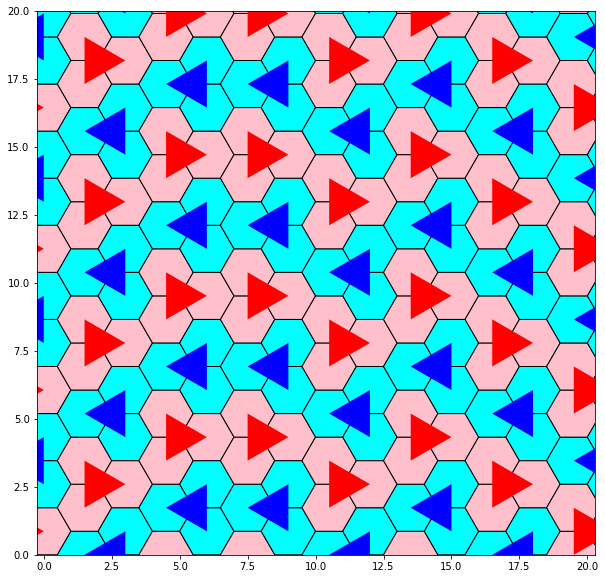

In [11]:
tlist0_ = make_stripe(-1, 1, 'red', 'white')
tlist0 = make_stripe(1, 2, 'red', 'white')
tlist1 = make_stripe(3, 0, 'red', 'white')
tlist2 = make_stripe(5, 0, 'red', 'white')
tlist3 = make_stripe(7, 2, 'red', 'white')
tlist4 = make_stripe(9, 0, 'red', 'white')
tlist5 = make_stripe(11, 2, 'red', 'white')
tlist6 = make_stripe(13, 1, 'red', 'white')

t = (tlist0_ + tlist0 + tlist1 + tlist2 + tlist3 + tlist4 + tlist5 + tlist6)
newlist = []
for ij, d, fc, bc in t:
    ind = (ij[0] - 1) // 2 - ij[1]
    if d == 0:
        fc = 'red'
        bc = 'pink'
    else:
        fc = 'blue'
        bc = 'cyan'
    newlist.append((ij, d, fc, bc))
draw(newlist)

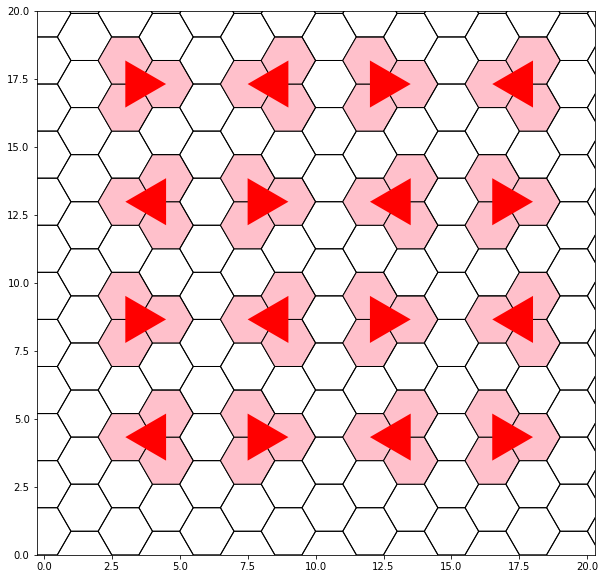

In [65]:
tlist0 = []
tlist0.append(((2, 2), 1, 'red', 'pink'))
tlist0.append(((3, 5), 0, 'red', 'pink'))
tlist0.append(((2, 7), 1, 'red', 'pink'))
tlist0.append(((3, 10), 0, 'red', 'pink'))

tlist0.append(((6, 2), 0, 'red', 'pink'))
tlist0.append(((5, 5), 1, 'red', 'pink'))
tlist0.append(((6, 7), 0, 'red', 'pink'))
tlist0.append(((5, 10), 1, 'red', 'pink'))

tlist0.append(((8, 2), 1, 'red', 'pink'))
tlist0.append(((9, 5), 0, 'red', 'pink'))
tlist0.append(((8, 7), 1, 'red', 'pink'))
tlist0.append(((9, 10), 0, 'red', 'pink'))

tlist0.append(((12, 2), 0, 'red', 'pink'))
tlist0.append(((11, 5), 1, 'red', 'pink'))
tlist0.append(((12, 7), 0, 'red', 'pink'))
tlist0.append(((11, 10), 1, 'red', 'pink'))
draw(tlist0)

0.007332689904984591


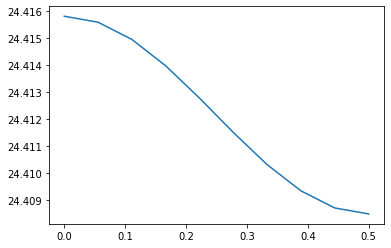

In [36]:
E = np.linspace(0, 0.5, 10)
P = np.zeros_like(E)
for j in range(len(E)):
    t = 0
    for i in range(-100000, 100000):
        t += 1 / np.sqrt(1 + (i - E[j])**2)
    P[j] = t
    
plt.plot(E, P)
print(P.max() - P.min())

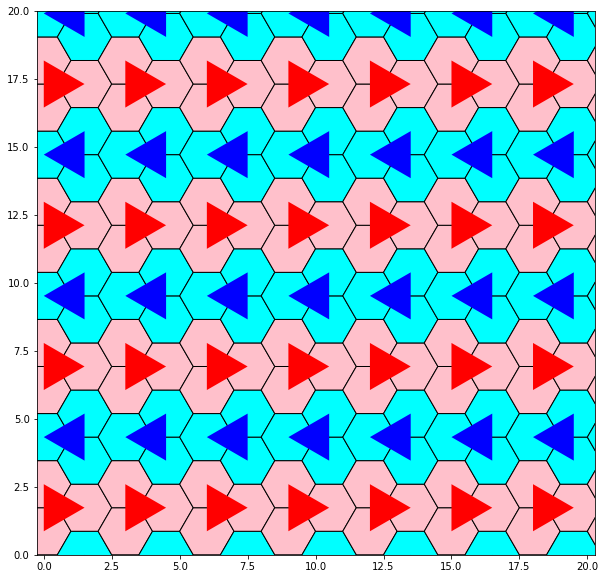

In [22]:
l = []
for i in range(nside):
    for j in range(nside * 2):
        l.append(((2 * j, -1 + 3 * i), 1, 'blue', 'cyan'))
        l.append(((1 + 2 * j, 1 + 3 * i), 0, 'red', 'pink'))
        
draw(l)

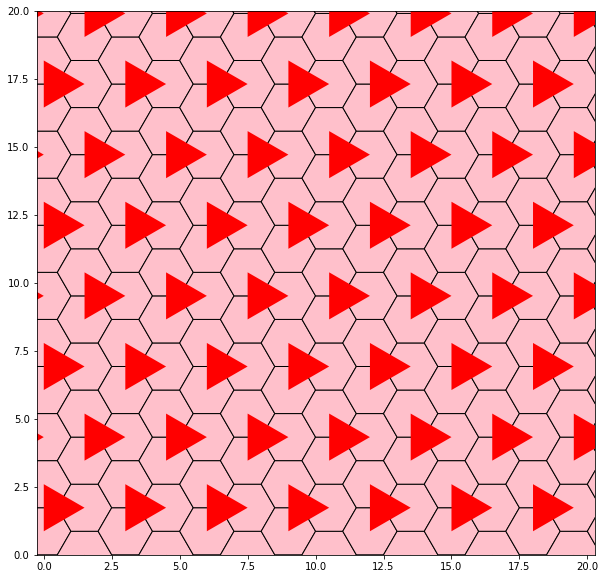

In [24]:
nside = 10
middle = nside * 2 * nside + nside
l = []
for i in range(nside):
    for j in range(nside * 2):
        l.append(((2 * j, -1 + 3 * i), 0, 'red', 'pink'))
        l.append(((-1 + 2 * j, 1 + 3 * i), 0, 'red', 'pink'))
        
draw(l)
#print(xy)

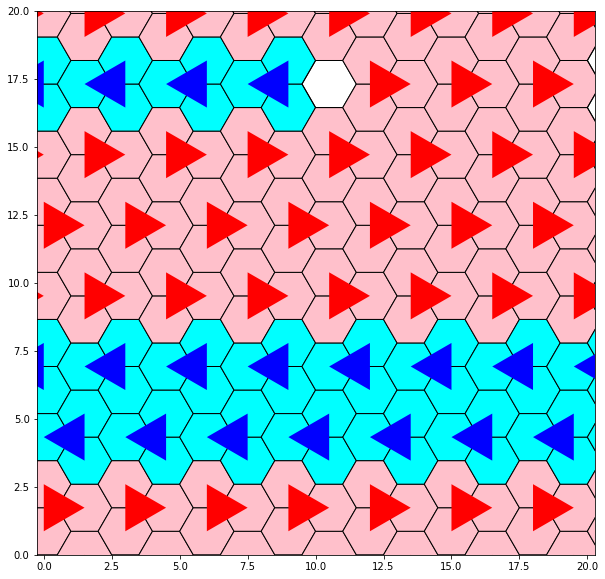

In [39]:
nside = 10
middle = nside * 2 * nside + nside
l = []

for j in range(nside * 2):
    l.append(((2 * j, -1 + 3 * 0), 0, 'red', 'pink'))
    l.append(((-1 + 2 * j, 1 + 3 * 0), 0, 'red', 'pink'))

for j in range(nside * 2):
    l.append(((2 * j, -1 + 3 * 1), 1, 'blue', 'cyan'))
    l.append(((-1 + 2 * j, 1 + 3 * 1), 1, 'blue', 'cyan'))
    
for j in range(nside * 2):
    l.append(((2 * j, -1 + 3 * 2), 0, 'red', 'pink'))
    l.append(((-1 + 2 * j, 1 + 3 * 2), 0, 'red', 'pink'))

for j in range(nside * 2):
    l.append(((2 * j, -1 + 3 * 3), 0, 'red', 'pink'))

l.append(((-1 + 2 * 0, 1 + 3 * 3), 1, 'blue', 'cyan'))
l.append(((-1 + 2 * 1, 1 + 3 * 3), 1, 'blue', 'cyan'))
l.append(((-1 + 2 * 2, 1 + 3 * 3), 1, 'blue', 'cyan'))
l.append(((-1 + 2 * 3, 1 + 3 * 3), 1, 'blue', 'cyan'))
l.append(((-1 + 2 * 5, 1 + 3 * 3), 0, 'red', 'pink'))
l.append(((-1 + 2 * 6, 1 + 3 * 3), 0, 'red', 'pink'))
l.append(((-1 + 2 * 7, 1 + 3 * 3), 0, 'red', 'pink'))


    
for j in range(nside * 2):
    l.append(((2 * j, -1 + 3 * 4), 0, 'red', 'pink'))
    l.append(((-1 + 2 * j, 1 + 3 * 4), 1, 'blue', 'cyan'))
        
draw(l)

#print(xy)